# Exploratory Data Analysis on Bipolar Disorders and Depression Datasets

## Project Report

##1.  Introduction, Background and Dataset

### 1. 1 Introduction
According to NIMH (National Institute of Mental Health), bipolar disorder (formerly called manic-depressive illness or manic depression) is a mental illness that causes unusual shifts in mood, energy, activity levels, concentration, and the ability to carry out day-to-day tasks. On the other hand, unipolar depression or major depressive disorder is a common but serious mood disorder. It causes severe symptoms that affect how you feel, think, and handle daily activities, such as sleeping, eating, or working. I chose this theme because I have always been interested in doing a data analysis project using mental-health related data. 

### 1. 2 Research Background 

In this section, I am going to explain the reason why I decided to do a research on bipolar disorders and depression. I will prove my points using a method called web scrapping. I am going to scrape an article from The Guardian. After that,  I will use two data set from Kaggle to do the Explanatory Data Analysis. I will only make some analysis based on current datasets and I will not make a prediction or find the justification for the results provided with the datasets. Firstly, let's do the web scrapping. 


### 1. 3  Dataset
In this project, 
1. The Guardian's Article (https://www.theguardian.com/society/2011/apr/14/bipolar-disorder-facts-symptoms#:~:text=People%20with%20bipolar%20disorder%20show,difficulty%20sleeping%20and%20suicidal%20thoughts.)
2. Global Mental Health Disorder ( credits to https://data.world/amitd on Kaggle) 
3. Our World in Data (https://ourworldindata.org/mental-health#bipolar-disorder) 
4. The Depression Dataset
( License : Public Domain 
  Acknowledgement : Enrique Garcia-Ceja, Michael Riegler, Petter Jakobsen, Jim Tørresen, Tine Nordgreen, Ketil J. Oedegaard, Ole Bernt Fasmer, Depresjon: A Motor Activity Database of Depression Episodes in Unipolar and Bipolar Patients, In MMSys'18 Proceedings of the 9th ACM on Multimedia Systems Conference, Amsterdam, The Netherlands, June 12 - 15, 2018.)


## 2.  Web Scrapping The Guardian's Article 
In this section, we are going to scrape a website called The Guardian (https://www.theguardian.com/society/2011/apr/14/bipolar-disorder-facts-symptoms#:~:text=People%20with%20bipolar%20disorder%20show,difficulty%20sleeping%20and%20suicidal%20thoughts.') to get some specific explanation data on bipolar disorders and depression, and also do sentiment analysis on the article, and also make a wordcloud. There are few steps to follow :

### 2. 1. Import all necessary libraries
We are going to import all libraries that are necessary to do web scrapping. 

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 
import re

### 2.2 Request permission
After we choose the web page that we want to scrape, we can attach the page's URL and use requests library to ask permisson from the server that we want to fetch the data from their site. 

In [ ]:
# create an URL object
url = 'https://www.theguardian.com/society/2011/apr/14/bipolar-disorder-facts-symptoms#:~:text=People%20with%20bipolar%20disorder%20show,difficulty%20sleeping%20and%20suicidal%20thoughts.'

# create object page
page = requests.get(url)
page

<Response [200]>

the output is Response [200]; which means that the server allows us to scrape data from their website. And now, we are going to use 'lxml' to parse the HTML code. 

In [ ]:
soup = BeautifulSoup(page.text, 'lxml')
soup

<!DOCTYPE html>
<html lang="en">
<head>
<!--

We are hiring, ever thought about joining us?
https://workforus.theguardian.com/careers/product-engineering/


                                    GGGGGGGGG
                           GGGGGGGGGGGGGGGGGGGGGGGGGG
                       GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
                    GGGGGGGGGGGGGGGGG      GG   GGGGGGGGGGGGG
                  GGGGGGGGGGGG        GGGGGGGGG      GGGGGGGGGG
                GGGGGGGGGGG         GGGGGGGGGGGGG       GGGGGGGGG
              GGGGGGGGGG          GGGGGGGGGGGGGGGGG     GGGGGGGGGGG
             GGGGGGGGG           GGGGGGGGGGGGGGGGGGG    GGGGGGGGGGGG
            GGGGGGGGG           GGGGGGGGGGGGGGGGGGGGGG  GGGGGGGGGGGGG
           GGGGGGGGG            GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
           GGGGGGGG             GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
          GGGGGGGG              GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
          GGGGGGGG              GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG

Now we can start to inspect and access the HTML elements. 

In [ ]:
# obtain information from the tag <> 
b = soup.find_all('p')
b

[<p class="dcr-h26idz"><strong>What is it?</strong></p>,
 <p class="dcr-h26idz"><a data-link-name="in body link" href="http://www.mind.org.uk/" title="">Mental health charity Mind</a> describes bipolar disorder (previously known as manic depression) as a mental illness which causes extreme mood swings from periods of hyperactivity and excited behaviour – known as mania – to deep depression. Each period can last several months, although many people with bipolar disorder have stable periods between extremes. The disorder can also cause hallucinations and delusions.</p>,
 <p class="dcr-h26idz"><strong>How many people have it?</strong></p>,
 <p class="dcr-h26idz">About 1 in every 100 adults has bipolar disorder at some point in their life, with men and women equally affected, according to the <a data-link-name="in body link" href="http://www.rcpsych.ac.uk/" title="">Royal College of Psychiatrists</a>. It usually starts during or after teenage years and is unusual in adults over 40.</p>,
 <

Let's check the title of the article.

In [ ]:
soup.title

<title>What is bipolar disorder? | Bipolar disorder | The Guardian</title>

Now, let's just get to the gist of the article by trying to access the p tags. 

In [ ]:
bip_elements = soup.find_all("p", class_="dcr-h26idz")
bip_elements

[<p class="dcr-h26idz"><strong>What is it?</strong></p>,
 <p class="dcr-h26idz"><a data-link-name="in body link" href="http://www.mind.org.uk/" title="">Mental health charity Mind</a> describes bipolar disorder (previously known as manic depression) as a mental illness which causes extreme mood swings from periods of hyperactivity and excited behaviour – known as mania – to deep depression. Each period can last several months, although many people with bipolar disorder have stable periods between extremes. The disorder can also cause hallucinations and delusions.</p>,
 <p class="dcr-h26idz"><strong>How many people have it?</strong></p>,
 <p class="dcr-h26idz">About 1 in every 100 adults has bipolar disorder at some point in their life, with men and women equally affected, according to the <a data-link-name="in body link" href="http://www.rcpsych.ac.uk/" title="">Royal College of Psychiatrists</a>. It usually starts during or after teenage years and is unusual in adults over 40.</p>,
 <

Now, we are going to get the texts only (i.e. throwing away our tags and classes)

In [ ]:
text = '''
 <p class="dcr-h26idz"><strong>What is it?</strong></p>,
 <p class="dcr-h26idz"><a data-link-name="in body link" href="http://www.mind.org.uk/" title="">Mental health charity Mind</a> describes bipolar disorder (previously known as manic depression) as a mental illness which causes extreme mood swings from periods of hyperactivity and excited behaviour – known as mania – to deep depression. Each period can last several months, although many people with bipolar disorder have stable periods between extremes. The disorder can also cause hallucinations and delusions.</p>,
 <p class="dcr-h26idz"><strong>How many people have it?</strong></p>,
 <p class="dcr-h26idz">About 1 in every 100 adults has bipolar disorder at some point in their life, with men and women equally affected, according to the <a data-link-name="in body link" href="http://www.rcpsych.ac.uk/" title="">Royal College of Psychiatrists</a>. It usually starts during or after teenage years and is unusual in adults over 40.</p>,
 <p class="dcr-h26idz"><strong>What triggers it?</strong></p>,
 <p class="dcr-h26idz">Less is known about the causes of bipolar disorder than other mental illnesses, but factors including genetics, hormone and brain chemical imbalances and stressful life events all play a part in triggering the disease, according to mental health charity <a data-link-name="in body link" href="http://www.rethink.org/" title="">Rethink</a>.</p>,
 <p class="dcr-h26idz">An overactive thyroid gland can mimic the symptoms of bipolar disorder, and it is important that this is ruled out by a blood test during diagnosis.</p>,
 <p class="dcr-h26idz"><strong>What are the signs and symptoms?</strong></p>,
 <p class="dcr-h26idz">People with bipolar disorder show signs of depression and/or mania. Signals of depression include feeling sad, empty or worthless, and can be accompanied by a lack of appetite, difficulty sleeping and suicidal thoughts.</p>,
 <p class="dcr-h26idz">Signs of mania include feeling elated, talking and thinking very quickly, being easily distracted, not eating or sleeping and being impulsive.</p>,
 <p class="dcr-h26idz">Sarah Freeman, who runs <a data-link-name="in body link" href="http://www.Bipolar-Lives.com" title="Bipolar-Lives.com">Bipolar-Lives.com</a>, says having the disorder caused her to "take a wrecking ball to my life". During manic periods she blew thousands of dollars, including spending $5,000 on furniture as a student living in a one-bedroom flat. She says hypersexuality, which often leads to infidelity, is common during mania.</p>,
 <p class="dcr-h26idz"><strong>How is it treated?</strong></p>,
 <p class="dcr-h26idz">John Geddes, professor of epidemiological psychiatry at Oxford University, says: "Treatment varies a lot from one patient to another. We can't just give a tablet or particular form of psychological treatment."</p>,
 <p class="dcr-h26idz">There is evidence that taking lithium can reduce relapses into mania, although it is less effective in controlling depressive relapse.</p>,
 <p class="dcr-h26idz">Some patients also benefit from psychological treatments, such as cognitive behavioural therapy (CBT).</p>,
 <p class="dcr-h26idz">Hospitalisation and electroconvulsive therapy (ECT) are occasionally used in severe cases. Exercise and avoiding stress are also thought to help.</p>,
 <p class="dcr-h26idz"><strong>What is bipolar II?</strong></p>,
 <p class="dcr-h26idz"><a data-link-name="in body link" href="http://www.rcpsych.ac.uk/" title="">The Royal College of Psychiatrists</a> defines four types of bipolar disorder: bipolar I, bipolar II, rapid cycling and cyclothymia.</p>,
 <p class="dcr-h26idz">Those with bipolar I tend to have mainly manic episodes of up to six months; while <a data-link-name="in body link" href="https://www.theguardian.com/film/2011/apr/13/catherine-zeta-jones-bipolar-disorder-treatment" title="">those with bipolar II, like Catherine Zeta Jones</a>, will mainly suffer from periods of depression and experience hypomania – a mild form of mania which induces creativity and productivity.</p>,
 <p class="dcr-h26idz">Rapid cycling is when more than four extreme mood swings happen within a year, while cyclothymia is when sufferers' mood swings are not as severe as those in full bipolar disorder, but can be longer. Cyclothymia can develop into the full disorder.</p>,
 <p class="dcr-h26idz"><strong>How has bipolar disorder been portrayed in films and on TV?</strong></p>,
 <p class="dcr-h26idz">Steven Soderbergh's The Informant! (2009), which stars Matt Damon as a bipolar whistleblower, was nominated for two Golden Globes last year, but historically films dealing with bipolar disorder have not been box office successes.</p>,
 <p class="dcr-h26idz">Television portrayals of the condition have been better received. The BBC's EastEnders storyline focusing on Stacey Branning's struggle with the disorder led to a rise in young people being diagnosed, according to <a data-link-name="in body link" href="http://www.mdf.org.uk/" title="">MDF, the Bi-Polar Organisation</a> (formerly the Manic Depression Fellowship).</p>,
 <p class="dcr-h26idz">Andy Bell from the <a data-link-name="in body link" href="http://www.centreformentalhealth.org.uk/" title="">Centre for Mental Health</a> says: "When film-making is done accurately and sensitively it sends out a positive message but when it is done badly it helps to reinforce stereotypes that are still common."</p>,
 <p class="dcr-h26idz"><strong>Are there any other notable people with bipolar disorder?</strong></p>,
 <p class="dcr-h26idz">Bipolar disorder has been described as "an occupational hazard" of celebrities. Notable sufferers include Axl Rose, Ludwig Van Beethoven, Jean-Claude Van Damme, Ben Stiller, Vivien Leigh, Sylvia Plath and Stephen Fry – who filmed a documentary, <a data-link-name="in body link" href="https://www.theguardian.com/society/2006/jul/21/mentalhealth.broadcasting" title="Stephen Fry: The Secret Life of a Manic Depressive">Stephen Fry: The Secret Life of a Manic Depressive</a>, on the condition.</p>,
 <p class="dcr-h26idz">Bell said: "Stephen Fry's documentary notably opened people's eyes to what it is like to have bipolar disorder and to show that people can survive, recover and live ordinary – and indeed extraordinary – lives."</p>,
 <p class="dcr-h26idz">Actor Charlie Sheen famously denies being bipolar, instead describing himself as "bi-winning".</p>
'''
soup = BeautifulSoup(text)

print(soup.get_text())

What is it?,
 Mental health charity Mind describes bipolar disorder (previously known as manic depression) as a mental illness which causes extreme mood swings from periods of hyperactivity and excited behaviour – known as mania – to deep depression. Each period can last several months, although many people with bipolar disorder have stable periods between extremes. The disorder can also cause hallucinations and delusions.,
 How many people have it?,
 About 1 in every 100 adults has bipolar disorder at some point in their life, with men and women equally affected, according to the Royal College of Psychiatrists. It usually starts during or after teenage years and is unusual in adults over 40.,
 What triggers it?,
 Less is known about the causes of bipolar disorder than other mental illnesses, but factors including genetics, hormone and brain chemical imbalances and stressful life events all play a part in triggering the disease, according to mental health charity Rethink.,
 An overacti

In [ ]:
len(soup.get_text())

4666

In [ ]:
clean_text= soup.get_text()

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
sentence=[]
tokens = nlp(clean_text)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))

In [ ]:
sentence

['What is it?,\n Mental health charity Mind describes bipolar disorder (previously known as manic depression) as a mental illness which causes extreme mood swings from periods of hyperactivity and excited behaviour – known as mania – to deep depression.',
 'Each period can last several months, although many people with bipolar disorder have stable periods between extremes.',
 'The disorder can also cause hallucinations and delusions.',
 ',\n How many people have it?,\n About 1 in every 100 adults has bipolar disorder at some point in their life, with men and women equally affected, according to the Royal College of Psychiatrists.',
 'It usually starts during or after teenage years and is unusual in adults over 40.,\n What triggers it?,\n Less is known about the causes of bipolar disorder than other mental illnesses, but factors including genetics, hormone and brain chemical imbalances and stressful life events all play a part in triggering the disease, according to mental health charit

In [ ]:
print(len(sentence))

24


In [ ]:
print(sentence[3])

,
 How many people have it?,
 About 1 in every 100 adults has bipolar disorder at some point in their life, with men and women equally affected, according to the Royal College of Psychiatrists.


Now, it is easier to read and access the passage to find the information about bipolar disorder and depression. From now on, we are going to find the sentimentality of each passages and try to make a wordcloud based on our article. 

In [ ]:
# importing the libraries
from textblob import TextBlob, Word, Blobber
# function to analyze the sentimentality (polarity & subjectivity of each passages)
textblob_sentiment=[]
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])

In [ ]:
# put it into a pandas dataframe
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])


In [ ]:
# get the first 5 datas
df_textblob.head()

,Sentence,Polarity,Subjectivity
0,"What is it?,\n Mental health charity Mind desc...",-0.019444,0.452778
1,"Each period can last several months, although ...",0.166667,0.188889
2,The disorder can also cause hallucinations and...,0.000000,0.000000
3,",\n How many people have it?,\n About 1 in eve...",0.250000,0.375000
4,It usually starts during or after teenage year...,-0.017708,0.386458


In [ ]:
# get the last 5 datas
df_textblob.tail()

,Sentence,Polarity,Subjectivity
19,The BBC's EastEnders storyline focusing on Sta...,0.050000,0.200000
20,",\n Andy Bell from the Centre for Mental Healt...",-0.062121,0.574242
21,""",\n Are there any other notable people with b...",0.187500,0.437500
22,"Notable sufferers include Axl Rose, Ludwig Van...",0.157744,0.516667
23,""",\n Actor Charlie Sheen famously denies being...",0.500000,1.000000


In [ ]:
# importing the libraries to tokenize the article 
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# creating the tokenizer
word_tokenize(clean_text)
wt = word_tokenize(clean_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


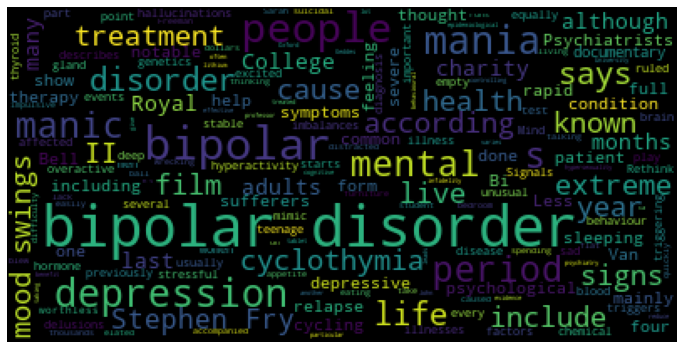

In [ ]:
# import all necessary libraries to make wordclouds
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# convert lists into string
clean_words_string = " ".join(wt)

# generate the wordcloud
wordcloud = WordCloud(background_color="black").generate(clean_words_string)

# plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

# to remove the axis value
plt.axis("off")
plt.show()

## 3. Dataset from ourworldindata.org
Now, we are going to take a data from ourworldindata.org and see the propensity for bipolar disorder around the world. (Classic CSV Dataset)

In [ ]:
# import the data
from google.colab import files
uploaded = files.upload()

Saving share-with-bipolar-disorder.csv to share-with-bipolar-disorder.csv


In [ ]:
# put the data into a dataframe
dsf = pd.read_csv("share-with-bipolar-disorder.csv")
dsf.head()

,Entity,Code,Year,Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1991,0.72
1,Afghanistan,AFG,1992,0.72
2,Afghanistan,AFG,1993,0.72
3,Afghanistan,AFG,1994,0.72
4,Afghanistan,AFG,1995,0.72


In [ ]:
# renaming the column
a = dsf.rename(columns={'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)': 'Percent'}, inplace=False)
a

,Entity,Code,Year,Percent
0,Afghanistan,AFG,1991,0.72
1,Afghanistan,AFG,1992,0.72
2,Afghanistan,AFG,1993,0.72
3,Afghanistan,AFG,1994,0.72
4,Afghanistan,AFG,1995,0.72
...,...,...,...,...
6834,Zimbabwe,ZWE,2015,0.56
6835,Zimbabwe,ZWE,2016,0.56
6836,Zimbabwe,ZWE,2017,0.56
6837,Zimbabwe,ZWE,2018,0.56


In [ ]:
dsf[:30]

,Entity,Code,Year,Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1991,0.72
1,Afghanistan,AFG,1992,0.72
2,Afghanistan,AFG,1993,0.72
3,Afghanistan,AFG,1994,0.72
4,Afghanistan,AFG,1995,0.72
5,Afghanistan,AFG,1996,0.72
6,Afghanistan,AFG,1997,0.72
7,Afghanistan,AFG,1998,0.72
8,Afghanistan,AFG,1999,0.72
9,Afghanistan,AFG,2000,0.72


In [ ]:
dsf[270:300]

,Entity,Code,Year,Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)
270,Armenia,ARM,1991,0.57
271,Armenia,ARM,1992,0.57
272,Armenia,ARM,1993,0.57
273,Armenia,ARM,1994,0.57
274,Armenia,ARM,1995,0.57
275,Armenia,ARM,1996,0.57
276,Armenia,ARM,1997,0.57
277,Armenia,ARM,1998,0.57
278,Armenia,ARM,1999,0.57
279,Armenia,ARM,2000,0.57


We can imply from the tabular data above that the percentage of the population afflicted by the bipolar disorder has been increasing. For example, in Armenia in 2004 it was 0.57% of the population and in 2005 it was 0.58% of the population. Not only that, if we compare Armenia to other country such as Afghanistan, we can see the same inclination. 

Now, we are going to use a different data I have gotten from Kaggle, called Mental health Depression disorder Data.csv

In [ ]:
# import data
from google.colab import files
uploaded = files.upload()

Saving Mental health Depression disorder Data.csv to Mental health Depression disorder Data.csv


In [ ]:
# put the csv data into a pandas dataframe
df3 = pd.read_csv("Mental health Depression disorder Data.csv")
df3.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [ ]:
# access only important data that we are going to use (% of bipolar disorder and % of depression)
new_headers = ['Entity', 'Year', 'Bipolar disorder (%)', 'Depression (%)']
new_df = df3[new_headers]
new_df.head()

,Entity,Year,Bipolar disorder (%),Depression (%)
0,Afghanistan,1990,0.697779,4.071831
1,Afghanistan,1991,0.697961,4.079531
2,Afghanistan,1992,0.698107,4.088358
3,Afghanistan,1993,0.698257,4.096190
4,Afghanistan,1994,0.698469,4.099582


In [ ]:
new_df.tail()

,Entity,Year,Bipolar disorder (%),Depression (%)
6463,Zimbabwe,2013,0.607993,3.128192
6464,Zimbabwe,2014,0.60861,3.140290
6465,Zimbabwe,2015,0.609363,3.155710
6466,Zimbabwe,2016,0.610234,3.174134
6467,Zimbabwe,2017,0.611242,3.192789


We bunch of NaNs data, it is better if we can drop that particular data so it won't affect our analysis.

In [ ]:
# drop NaNs
new_df.dropna(axis=0, inplace=False)

,Entity,Year,Bipolar disorder (%),Depression (%)
0,Afghanistan,1990,0.697779,4.071831
1,Afghanistan,1991,0.697961,4.079531
2,Afghanistan,1992,0.698107,4.088358
3,Afghanistan,1993,0.698257,4.096190
4,Afghanistan,1994,0.698469,4.099582
...,...,...,...,...
6463,Zimbabwe,2013,0.607993,3.128192
6464,Zimbabwe,2014,0.60861,3.140290
6465,Zimbabwe,2015,0.609363,3.155710
6466,Zimbabwe,2016,0.610234,3.174134


In [ ]:
new_df.tail()

,Entity,Year,Bipolar disorder (%),Depression (%)
6463,Zimbabwe,2013,0.607993,3.128192
6464,Zimbabwe,2014,0.60861,3.140290
6465,Zimbabwe,2015,0.609363,3.155710
6466,Zimbabwe,2016,0.610234,3.174134
6467,Zimbabwe,2017,0.611242,3.192789


Now we have fixed our data, let's find the mean of the percentage of the population that are afflicted by bipolar disorder and depression. 

In [ ]:
new_df['Bipolar disorder (%)'].mean()

TypeError: ignored

it looks like there are some values that can't be converted into float. we can use the numpy array method to convert all values into float data types. 

In [ ]:
import numpy as np
floatDf = np.asarray(a, dtype=float)

In [ ]:
floatDf.mean()

0.7191451893939395

In [ ]:
new_df['Depression (%)'].mean()

3.497653585961657

### Conclusion
Approximately, 0.7% of the world's population are afflicted by Bipolar Disorder while 3.5% of the world's population are afflicted by Depression. Considering the ever-increasing number of the world's population, these percentages are not small at all. We can see that there are many people that are afflicted by bipolar disorder and or depression. This sparks an interest in me. This made me decided that I want to do an analysis on both disorder. 

## 4.  The Depression Dataset 
This main data set that I will use for EDA is also origianally from Kaggle. The dataset contains two folders, whereas one contains the data for the controlled group or controlled patients (the group of patients that do not receive the new treatment being studied.) and one for the conditioned group. For each patient, a csv file has been provided. The csv files contain the actigraph data (Actigraphy is a validated method of objectively measuring sleep parameters and average motor activity over a period of days to weeks using a noninvasive accelerometer, to objectively test the quality and quantity of sleep ) collected over time. The columns of the data are: timestamp (per one minute intervals), date (date of measurement), activity (activity measurement from the actigraph watch). 
In addition, the MADRS scores provided in the file "scores.csv". It contains the following columns; 
* number (patient identifier)
* days (number of days of measurements) 
* gender (1 for female and 2 for male)
* age (in age groups)
* afftype (1: bipolar II, 2: unipolar depressive, 3: bipolar I)
* melanch (1: melancholia, 2: no melancholia) 
* inpatient (1: inpatient, 2: outpatient)
* edu (education grouped in years)
* marriage (1: married or cohabiting, 2: single)
* work (1: working or studying, 2: unemployed/sick leave/pension)
* madrs1 (MADRS score when measurement started)
* madrs2 (MADRS when measurement stopped)

Source: Kaggle

research paper about cartigraphy :
* https://www.cambridge.org/core/journals/european-psychiatry/article/screening-for-depression-the-added-value-of-actigraphy-and-smartphonebased-intensive-sampling-of-depressive-affect-and-behaviors/8CD933A7E8BF45FC7357366FAEBAEFBD

* http://www.journaldmims.com/article.asp?issn=0974-3901;year=2020;volume=15;issue=4;spage=597;epage=600;aulast=Ransing

* https://journals.lww.com/jfmpc/Fulltext/2021/10090/Comparison_of_actigraphy_indices_among_patients.42.aspx

* https://www.nature.com/articles/s41598-021-92890-w


## 1. Import all the necessary libraries for EDA
Firstly, we are going to import all the necessary libraries for this project. 

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# upload the csv file 
from google.colab import files
uploaded = files.upload()

In [ ]:
# using missigno to visualize data
import missingno as mi

## 2. Read and load the data 
In this step, we are going to load the data into the dataframe. We are going to read a CSV (comma separated value) into our pandas dataframe. 

In [ ]:
# upload the csv file 
from google.colab import files
uploaded = files.upload()

Saving scores.csv to scores.csv


In [ ]:
# loading the file into pandas dataframe
df = pd.read_csv("scores.csv")

# display the top 5 rows 
df.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


In [ ]:
df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


From the result above, we know that from row 23 and below, we have multiple missing values; we have our controlled group, which means that these groups of patients do not receive treatment during studies; therefore we do not get the datas except for label 'days', 'gender' and 'age'. 

In [ ]:
# displays the information of the dataframe
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


In [ ]:
# describe the data
df.describe()

,days,gender,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
count,55.000000,55.000000,23.000000,20.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,12.600000,1.454545,1.739130,1.950000,1.782609,1.521739,1.869565,22.739130,20.000000
std,2.491467,0.502519,0.540824,0.223607,0.421741,0.510754,0.344350,4.797892,4.729021
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,11.000000
25%,13.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,18.500000,16.000000
50%,13.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,24.000000,21.000000
75%,13.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,26.000000,24.500000
max,20.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,29.000000,28.000000


As we can see from above, afftype, inpatient, marriage, work, madrs1, madrs2 have 23 data while on the other hand, melanch has only 20 data. Therefore, we can imply that we have missing values. 

We can try to visualise it:


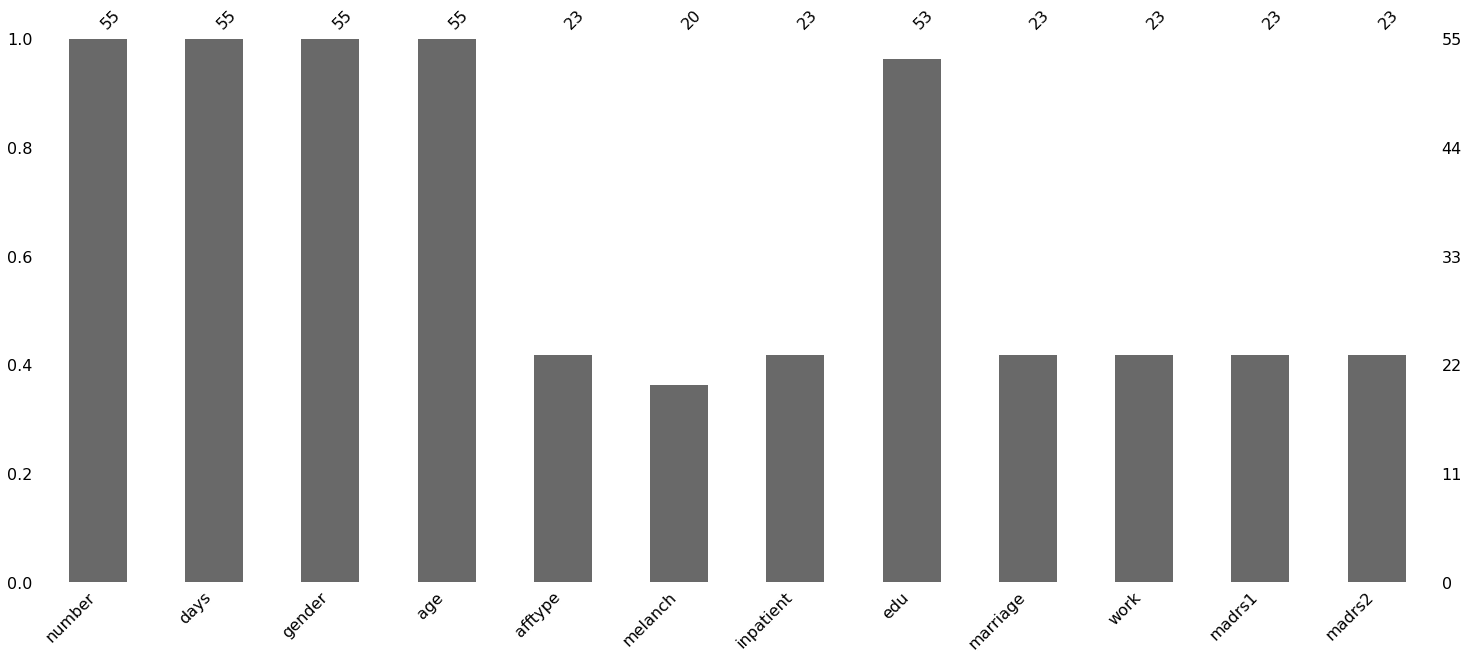

In [ ]:
# import the library
import missingno as mi
# visualize
mi.bar(df)
plt.show()

In [ ]:
# find the null values on the dataset
df.isnull()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,True,False,False,False,False,False,False
7,False,False,False,False,False,True,False,False,False,False,False,False
8,False,False,False,False,False,True,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


As we can see from the dataset above, we have some values (for example the types of disorders) that are represented by numbers instead of words; making it harder to understand the data. So we can make a new function called to_obj to return the name of the disorders based on values 1, 2 or 3. 

In [ ]:
def to_obj(value):
    if value == 1:
        return 'Bipolar second'
    elif value == 2:
        return 'Unipolar depressive'
    elif value == 3:
        return 'Bipolar one'
    else:
        return None
df['aff_type'] = df['afftype'].apply(lambda x: to_obj(x))

df.head()
	

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,aff_type,genderObj
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,Unipolar depressive,Male
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,Bipolar second,Male
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,Unipolar depressive,Female
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,Unipolar depressive,Male
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,Unipolar depressive,Male


We can do the same for the gender data. 

In [ ]:
def to_object(value):
    if value == 1:
        return 'Female'
    else:
        return 'Male'
df['genderObj'] = df['gender'].apply(lambda x: to_object(x))

df.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,aff_type,genderObj
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,Unipolar depressive,Male
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,Bipolar second,Male
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,Unipolar depressive,Female
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,Unipolar depressive,Male
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,Unipolar depressive,Male


Since we have 2 groups on this data, we can separate those two groups into 2 objects called df_condition and df_control

In [ ]:
# separate the dataset
df_condition = df[df.number.str.contains('condition')].copy()
df_control = df[df.number.str.contains('control')].copy()

In [ ]:
# find the shape
df_condition.shape

(23, 14)

In [ ]:
# check the dataset
df_condition

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,aff_type,genderObj
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,Bipolar second,Male
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,Bipolar first,Male
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,Bipolar second,Female
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,Bipolar second,Male
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,Bipolar second,Male
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0,Bipolar second,Female
6,condition_7,11,1,20-24,1.0,0.0,2.0,11-15,2.0,1.0,24.0,25.0,Bipolar first,Female
7,condition_8,5,2,25-29,2.0,0.0,2.0,11-15,1.0,2.0,20.0,16.0,Bipolar second,Male
8,condition_9,13,2,45-49,1.0,0.0,2.0,6-10,1.0,2.0,26.0,26.0,Bipolar first,Male
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0,Bipolar second,Male


In [ ]:
# check whether the data has null values or not 
df_condition['edu'].isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
Name: edu, dtype: bool

In [ ]:
# check whether the data has null values or not 
df_condition['melanch'].isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7      True
8      True
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
Name: melanch, dtype: bool

Using the isnull() method, on the row 6, 7, 8 we have 3 true boolean values, which means that 3 missing values. There are many ways to handle missing value, but I have chosen to keep it that way (i.e. not deleting it) but label it differently. 

In [ ]:
# label the NaN value differently 
df['melanch'][:23].fillna(0.0, inplace=True)
df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,aff_type,genderObj
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,Unipolar depressive,Male
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,Bipolar second,Male
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,Unipolar depressive,Female
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,Unipolar depressive,Male
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,Unipolar depressive,Male
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0,Unipolar depressive,Female
6,condition_7,11,1,20-24,1.0,0.0,2.0,11-15,2.0,1.0,24.0,25.0,Bipolar second,Female
7,condition_8,5,2,25-29,2.0,0.0,2.0,11-15,1.0,2.0,20.0,16.0,Unipolar depressive,Male
8,condition_9,13,2,45-49,1.0,0.0,2.0,6-10,1.0,2.0,26.0,26.0,Bipolar second,Male
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0,Unipolar depressive,Male


In [ ]:
# fill melanch
df_condition['melanch'].fillna(0.0, inplace=True)
df_condition

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,aff_type,genderObj
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,Bipolar second,Male
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0,Bipolar first,Male
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0,Bipolar second,Female
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0,Bipolar second,Male
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0,Bipolar second,Male
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0,Bipolar second,Female
6,condition_7,11,1,20-24,1.0,0.0,2.0,11-15,2.0,1.0,24.0,25.0,Bipolar first,Female
7,condition_8,5,2,25-29,2.0,0.0,2.0,11-15,1.0,2.0,20.0,16.0,Bipolar second,Male
8,condition_9,13,2,45-49,1.0,0.0,2.0,6-10,1.0,2.0,26.0,26.0,Bipolar first,Male
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0,Bipolar second,Male


In [ ]:
# find the shape
df_control.shape

(32, 14)

In [ ]:
# check the dataset once again
df_control

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,aff_type,genderObj
23,control_1,8,2,25-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Male
24,control_2,20,1,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,None,Female
25,control_3,12,2,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,None,Male
26,control_4,13,1,25-29,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,None,Female
27,control_5,13,1,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,None,Female
28,control_6,13,1,25-29,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,None,Female
29,control_7,13,1,20-24,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,None,Female
30,control_8,13,2,40-44,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,None,Male
31,control_9,13,2,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,None,Male
32,control_10,8,1,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,None,Female


In [ ]:
# find the correlation
df.corr()

,days,gender,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
days,1.000000,-0.073955,-0.184464,0.409567,-0.223032,0.390647,0.045526,0.122678,0.027726
gender,-0.073955,1.000000,0.064884,-0.005547,0.175655,0.038169,-0.079259,-0.104832,-0.303410
afftype,-0.184464,0.064884,1.000000,0.259938,-0.259938,-0.143091,0.053060,-0.132523,0.088863
melanch,0.409567,-0.005547,0.259938,1.000000,-0.080000,0.209183,0.204124,-0.105482,-0.259815
inpatient,-0.223032,0.175655,-0.259938,-0.080000,1.000000,-0.293590,-0.204124,-0.523501,-0.410235
marriage,0.390647,0.038169,-0.143091,0.209183,-0.293590,1.000000,0.146077,0.447590,0.150551
work,0.045526,-0.079259,0.053060,0.204124,-0.204124,0.146077,1.000000,0.281104,0.027913
madrs1,0.122678,-0.104832,-0.132523,-0.105482,-0.523501,0.447590,0.281104,1.000000,0.653090
madrs2,0.027726,-0.303410,0.088863,-0.259815,-0.410235,0.150551,0.027913,0.653090,1.000000


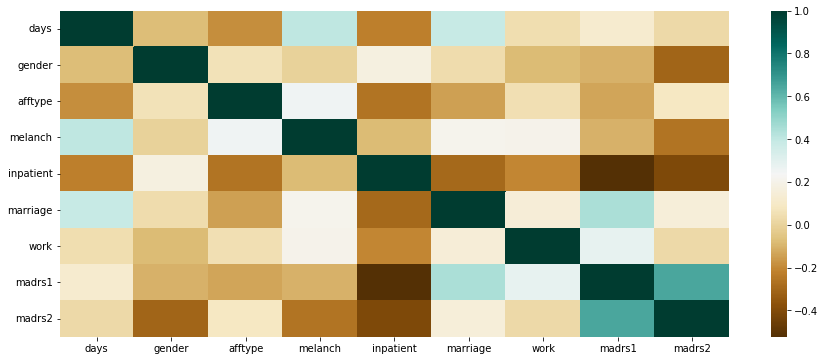

In [ ]:
# plot the correlation using heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(df.corr(),cmap="BrBG")

A correlation coefficient of 1.0 means that two variables have perfectly positive correlation. As one variable changes, so does the other. Though this does not mean that one variable directly impacts the outcome or changes to the other, both variables always move in tandem and are most likely highly related. We can use this figure as a reference to explore our data set in the next upcoming sessions. 

## 3. Explore the Dataset

In [ ]:
# find the number of 'age'
df['age'].value_counts() 

45-49    9
50-54    9
35-39    7
25-29    7
30-34    7
20-24    6
40-44    5
60-64    2
65-69    2
55-59    1
Name: age, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


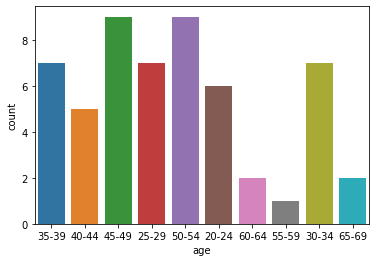

In [ ]:
# plot 'age' using seaborn
sns.countplot('age', data=df)

In [ ]:
# # find the number of 'gender'
# 1 female, 2 male 
df['gender'].value_counts() 

1    30
2    25
Name: gender, dtype: int64

We know that there are more females than males in our dataset. 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


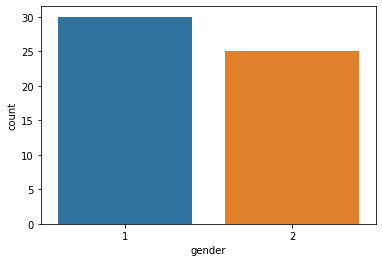

In [ ]:
# plot the 'gender' 
sns.countplot('gender', data=df)

In [ ]:
# find the number of 'edu'
df['edu'].value_counts() 

         31
6-10     12
11-15     8
16-20     2
Name: edu, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


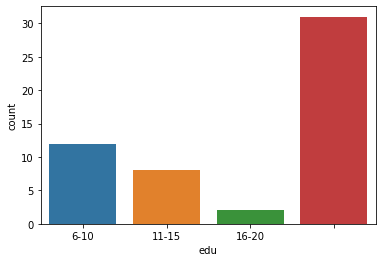

In [ ]:
sns.countplot('edu', data=df)

As we can see above, it seems that we have some unlabeled datas and the plot is also not easy to understand. We will get back to this later. 

In [ ]:
# find the number of 'inpatient' data
# 1 means inpatient, 2 means ambulatory care
df['inpatient'].value_counts() 

2.0    18
1.0     5
Name: inpatient, dtype: int64

We have more patients that are in ambulatory care. 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


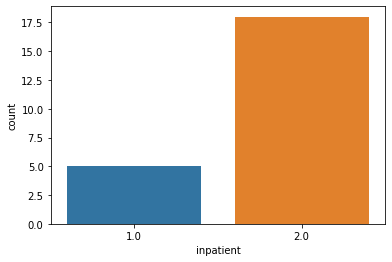

In [ ]:
# plot the 'inpatient' data
sns.countplot('inpatient', data=df)

In [ ]:
# find the number of 'work' data
# 1 = have work, 2 = unemployed
df['work'].value_counts() 

2.0    20
1.0     3
Name: work, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


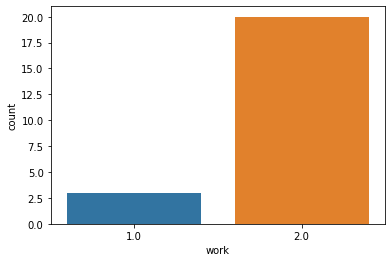

In [ ]:
sns.countplot('work', data=df)

In this dataset, we have more patients that are unemployed than patients that are not. Will this tell something about the absence or presence of the disorder? We will get back to this later. 

### 3. 1 The average number of days the patients are observed 

In [ ]:
# find the number of 'days'data 
df['days'].value_counts()

13    31
14     6
11     3
9      3
16     3
8      3
12     2
18     1
7      1
5      1
20     1
Name: days, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


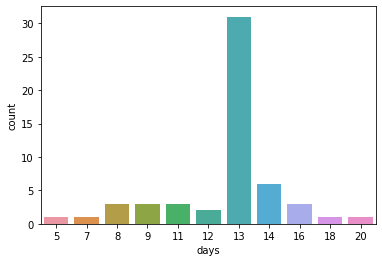

In [ ]:
# plot the data
sns.countplot('days', data=df)

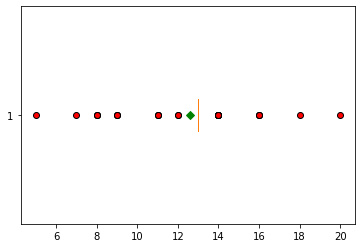

In [ ]:
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.boxplot(x=df['days'], vert=False, flierprops=red_circle, 
             showmeans=True, meanprops=mean_shape);

Most patients are observed for 13 days. 

### 3. 2  The difference between bipolar 1, bipolar 2 and unipolar depressive and the correlation between gender and melancholic feelings in bipolar disorders and depression.

Bipolar II disorder is diagnosed when a person experiences a pattern of depressive episodes and hypomanic episodes, but not the full-blown manic episodes found in bipolar I disorder. However, some Bipolar II patients may have longer lasting and more severe bouts of depression.

On the other hand, bipolar I is diagnosed when a person experiences exceptional energy restlessness, trouble concentrating, feelings of euphoria (extreme happiness), risky behaviors and poor sleep

Unipolar depressive disorder or Unipolar depression is another name for major depressive disorder. The term “unipolar” means that this form of depression does not cycle through other mental states, such as mania. In contrast, bipolar conditions cause periods of both depression and mania.

From this paper (https://link.springer.com/article/10.1007/s00406-022-01546-x) it is stated that "Non-melancholic depressions were overrepresented in females, while melancholic depressions had a female:male ratio closer to unity. Patients with melancholia had more history of BD in first-degree relatives and better functional outcome than those with non-melancholic depression. " 

Let's check it on our data. 


In [ ]:
df['melanch'][:23] # from our conditioned group data. 1 = melancholia, 2 = no melancholia, 0 = No Data 

0     2.0
1     2.0
2     2.0
3     2.0
4     2.0
5     2.0
6     0.0
7     0.0
8     0.0
9     2.0
10    2.0
11    2.0
12    2.0
13    2.0
14    2.0
15    2.0
16    2.0
17    2.0
18    2.0
19    1.0
20    2.0
21    2.0
22    2.0
Name: melanch, dtype: float64

In [ ]:
df['gender'].value_counts()

1    30
2    25
Name: gender, dtype: int64

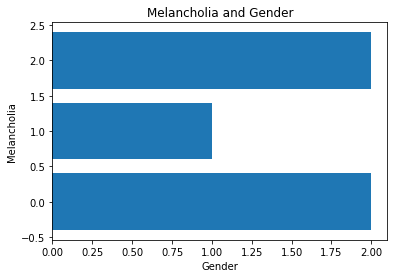

In [ ]:
plt.barh(df.melanch, df.gender)
plt.title('Melancholia and Gender')
plt.xlabel('Gender')
plt.ylabel('Melancholia')
plt.show()

Gender 2 = Male, Gender 1 = Female. Melancholia 1 = with melancholia, Melancholia 2 = no melancholia. **Therefore, we have proven that non-melancholic depressions were most represented in males. **

### 3.3  Days observed with respect to disorders and gender
Let's find the distribution of days observed with respect to the disorders (bipolar 1, bipolar 2 and depression) and gender. 

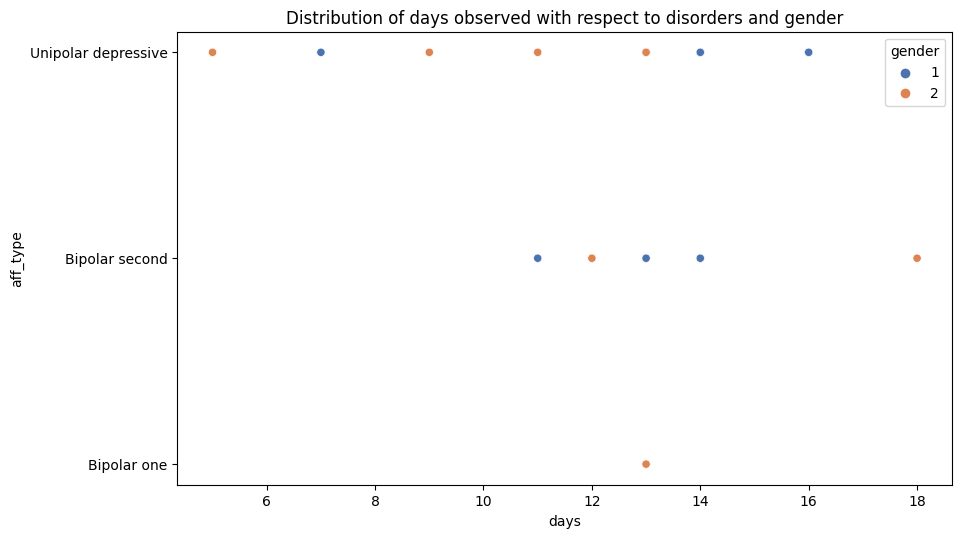

In [ ]:
# define the size of the figure
plt.figure(figsize=(10, 6), dpi =100)
# define the title 
plt.title('Distribution of days observed with respect to disorders and gender')
# make the scatterplot 
sns.scatterplot(x = 'days', y = 'aff_type', hue = 'gender', data = df, palette = 'deep')
# show the figure
plt.show()
plt.close()

### 3. 4 MADRS 2 and MADRS 1
From Wikipedia (https://en.wikipedia.org/wiki/Montgomery%E2%80%93%C3%85sberg_Depression_Rating_Scale) , The Montgomery–Åsberg Depression Rating Scale (MADRS) is a ten-item diagnostic questionnaire which psychiatrists use to measure the severity of depressive episodes in patients with mood disorders.
Higher MADRS score indicates more severe depression, and each item yields a score of 0 to 6. The overall score ranges from 0 to 60.

The questionnaire includes questions on the following symptoms 1. Apparent sadness 2. Reported sadness 3. Inner tension 4. Reduced sleep 5. Reduced appetite 6. Concentration difficulties 7. Lassitude 8. Inability to feel 9. Pessimistic thoughts 10. Suicidal thoughts

Usual cutoff points are:

0 to 6 – normal/symptom absent

7 to 19 – mild depression

20 to 34 – moderate depression

34 – severe depression.


In [ ]:
# find the 'madrs1' data from conditioned group
a = df['madrs1'][:23]

In [ ]:
# # find the 'madrs2' data from conditioned group
b = df['madrs2'][:23]

In [ ]:
b-a

0      0.0
1    -13.0
2      1.0
3     -4.0
4      0.0
5     -3.0
6      1.0
7     -4.0
8      0.0
9     -7.0
10     0.0
11    -4.0
12    -5.0
13    -9.0
14     4.0
15     4.0
16    -2.0
17    -3.0
18    -5.0
19    -2.0
20    -5.0
21    -1.0
22    -6.0
dtype: float64

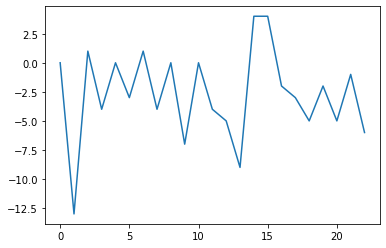

In [ ]:
plt.plot(b - a) # treatment 2 - treatment 1

we can see from the graph above that the value of MADRS2 decreases after the treatment. 

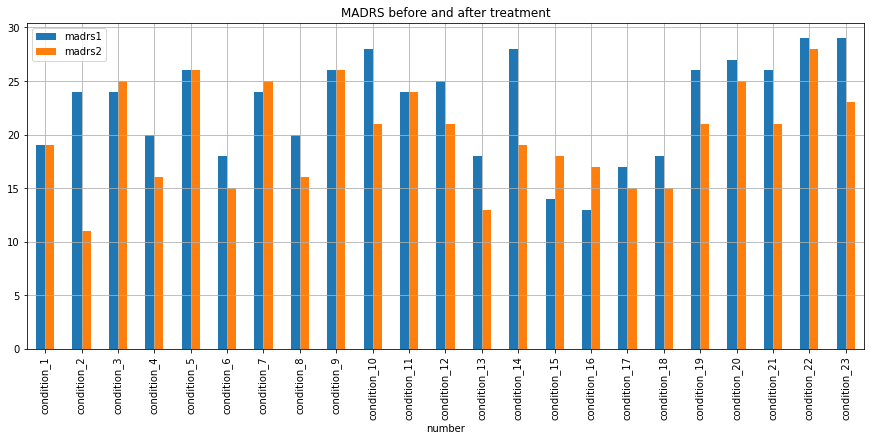

In [ ]:
# plot the conditioned group data
df[:23].plot(x='number', y=['madrs1','madrs2'], kind='bar', figsize=(15, 6))
# name the title 
plt.title('MADRS before and after treatment')
# add some grid
plt.grid()
# show the plot
plt.show()

The graph above shows the MADRS score before and after treatment was induced.

### 3. 5 Inpatient and Disorders
In this section, we are going to plot the relationship between inpatient data and afftype (disorders type).

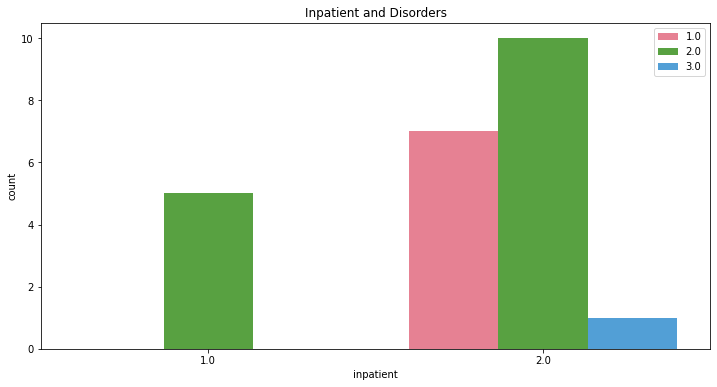

In [ ]:
# define the size of the figure
plt.figure(figsize=(12,6))
# define the title
plt.title('Inpatient and Disorders')
# plot 
sns.countplot(x='inpatient', data = df, hue = 'afftype', palette='husl')
# define the position of the legend
plt.legend(loc='upper right')
# show figure
plt.show()
plt.close()

we know from the figure above, in this data set, that patients that are not in ambulatory care i.e. inpatient patients are the bipolar 2 disorder's patients. 

### 3. 6 Marriage and Disorders
In this section, we are going to find the relationship between marriage and afftype.



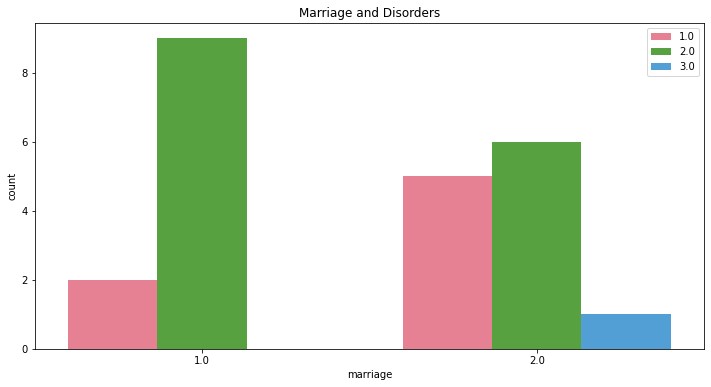

In [ ]:
# define the size of the figure
plt.figure(figsize=(12,6))
# define the title
plt.title('Marriage and Disorders')
# plot the figure
sns.countplot(x='marriage', data = df, hue = 'afftype', palette='husl')
# determine the position of the legend
plt.legend(loc='upper right')
# show figure
plt.show()
plt.close()

### 3. 7 Relationship between age and being bipolar or depressed
In this section, we are going to find the relationship between age and being bipolar or depressed. 

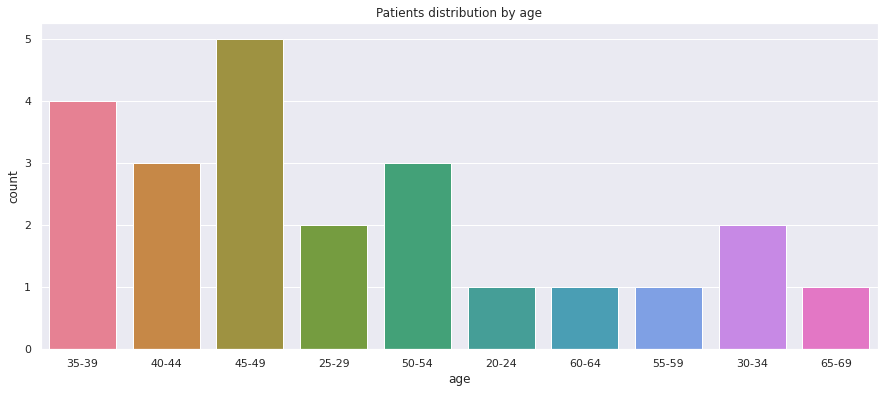

In [ ]:
# plot the figure
plt.figure(figsize=(15,6))
#define the name of the figure
plt.title('Patients distribution by age')
# plot using seaborn
sns.countplot(x='age', data = df, palette='husl')
plt.show()
plt.close()

From the figure above, in this data set, we know that the majority of people afflicted by these disorders are in the age group between 45 and 49 and in the age group between 50 and 54


### 3. 8 Unipolar Depressive, Bipolar 1 and Bipolar 2 
In this section, we are going to find the number of people afflicted by unipolar depressive, bipolar 1 and bipolar 2 respectively.

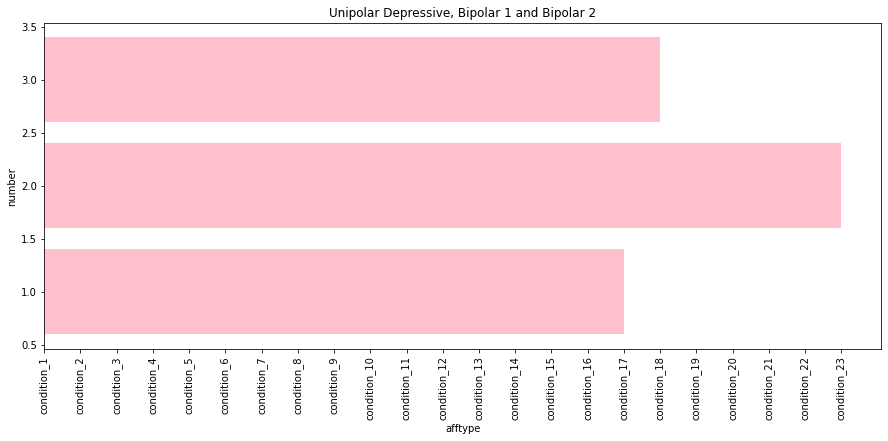

In [ ]:
# read the dataset
df = pd.read_csv("scores.csv")[:23]
# plot the data
plt.barh(df.afftype, df.number, color=['pink'])
# define the title
plt.title('Unipolar Depressive, Bipolar 1 and Bipolar 2')
# name the x label
plt.xlabel('afftype')
# rotate the xticks 90 degrees
plt.xticks(rotation=90)
# name the y label
plt.ylabel('number')
# define the size of the grid 
plt.gcf().set_size_inches(15, 6)
# show the figure
plt.show()

We can conclude that in this data set, we have bipolar 2 patients the most.

We can also view it individually : 

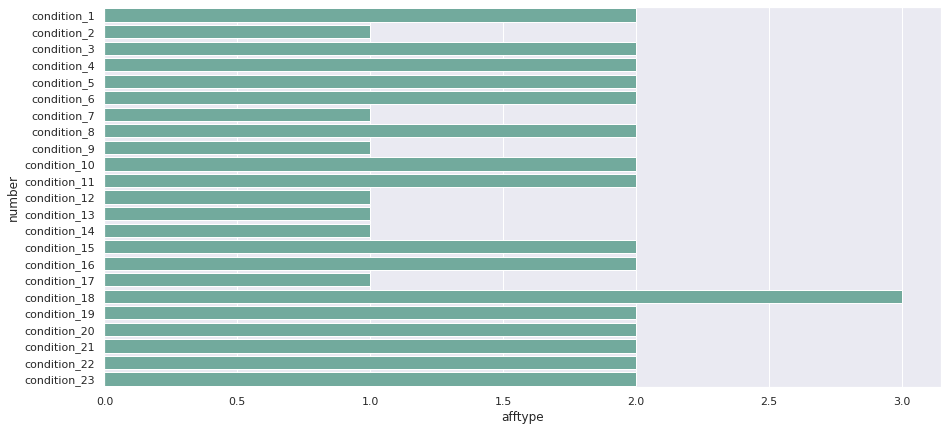

In [ ]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")
# load dataset
#tips = sns.load_dataset("scores_csv")
df = pd.read_csv("scores.csv")[:23]
# Set the figure size
plt.figure(figsize=(15, 7))
# plot a bar chart
sns.barplot(
    x="afftype", 
    y="number", 
    data=df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2')

### 3. 9 Unemployment or Employment vs Disorders
In this section, we are going to find the relationship between unemployment or employment vs being afflicted by bipolar disorders or depression. 

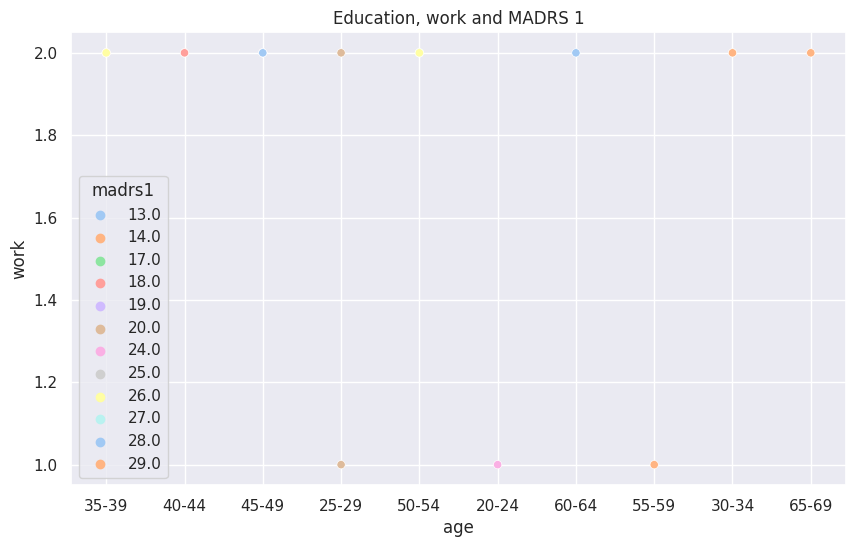

In [ ]:
# define the figure size
plt.figure(figsize=(10, 6), dpi =100)
# define the title
plt.title('Education, work and MADRS 1')
# plot the figure
sns.scatterplot(x = 'age', y = 'work', hue = 'madrs1', data = df, palette = 'pastel')
# show the figure
plt.show()
# close the figure
plt.close()

Let's now compare MDRS 2 with education and work. 


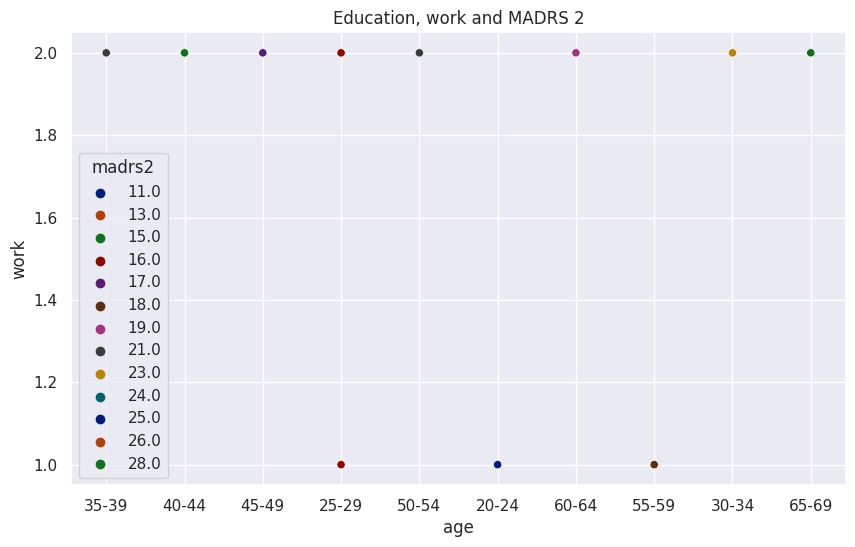

In [ ]:
# define the figure size
plt.figure(figsize=(10, 6), dpi =100)
# define the title
plt.title('Education, work and MADRS 2')
# plot the figure
sns.scatterplot(x = 'age', y = 'work', hue = 'madrs2', data = df, palette = 'dark')
# show the figure
plt.show()
# close the figure
plt.close()

From the figure above, we can conclude that people with no jobs have significantly higher MADRS 1 and MADRS 2 in average than people with jobs. 

### 4. 0 Depression in women vs in men
I have recently read a paper which stated that the reason why women and men get depressed is different. It is stated that internal problems, like interpersonal relationships often become the reason why some women get depressed. On the other hand, external problems, like not being able to find jobs (unemployment) often become the reason why some men get depressed. In this section, I would like to find the relationship between depression in women and men and their causes, in this data set we are going to compare it with employed or unemployed data. 

research paper : 
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4478054/

* https://www.frontiersin.org/articles/10.3389/fgene.2020.562316/full

what the data has shown:


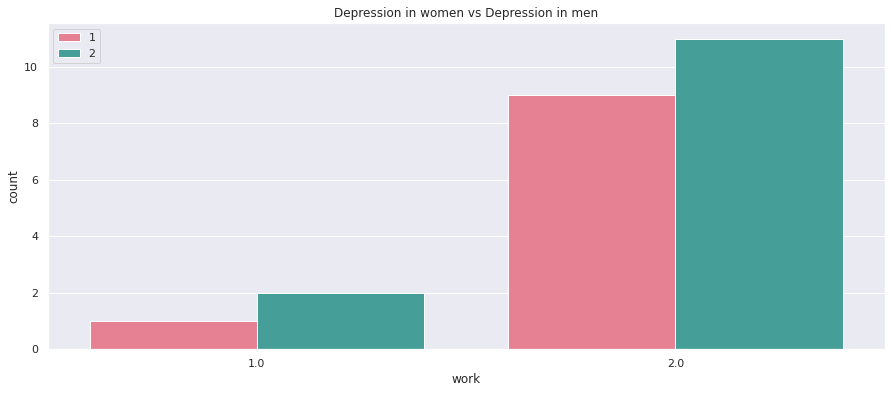

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Depression in women vs Depression in men')
sns.countplot(x='work', data = df, hue = 'gender', palette='husl')
plt.legend(loc='upper left')
plt.show()
plt.close()

Even though we have more females data in this data set, from the figure above we can conclude that number of men that do not have jobs or are not currenly studying and have mental disorders (bipolar disorder 1, bipolar disorder 2 or unipolar depressive) are higher than the number of women that do not have jobs or are not currenly studying and have mental disorders. **We can conclude that unemployment could be a trigger for some men, as stated by two research papers above. **

### 4. 1 Individual research on control group 
In this section, we are going to do an individual research on a control group data control_10.csv

In [ ]:
# import data 
from google.colab import files
uploaded = files.upload()

Saving control_10.csv to control_10.csv


In [ ]:
# read the data
df2 = pd.read_csv("control_10.csv")
df2.head()

,timestamp,date,activity
0,2003-11-18 09:00:00,2003-11-18,30
1,2003-11-18 09:01:00,2003-11-18,130
2,2003-11-18 09:02:00,2003-11-18,70
3,2003-11-18 09:03:00,2003-11-18,3
4,2003-11-18 09:04:00,2003-11-18,3


In [ ]:
df2['activity'].mean()

280.40909720618794

In [ ]:
df2.shape

(21655, 3)

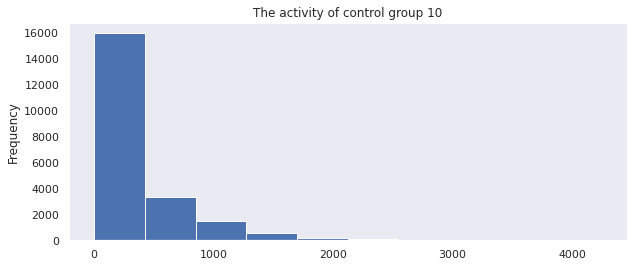

In [ ]:
# plot the data
plt.figure(figsize=(10,4))
# define the kind of plot
df2.activity.plot(kind='hist', bins=10)
# define the title 
plt.title('The activity of control group 10')
plt.grid()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


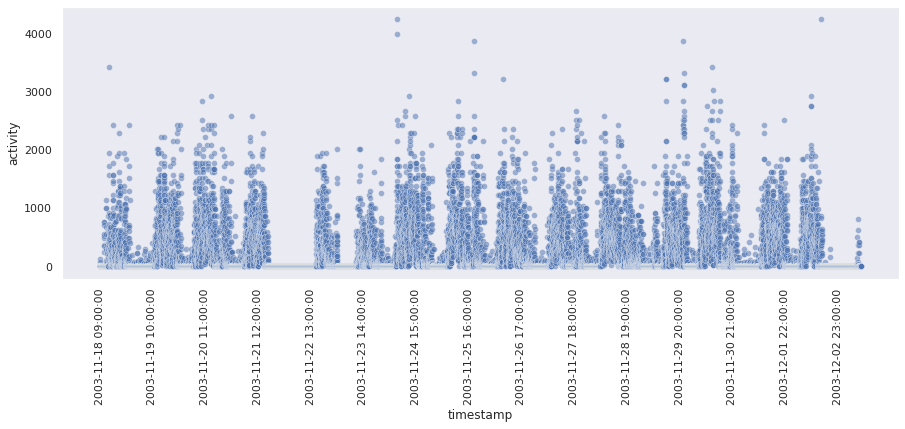

In [ ]:
# plot the figure
plt.figure(figsize=(15,5))
# set the axis
ax = sns.scatterplot(df2.timestamp, df2.activity, alpha=0.5)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
# rotate the axis
plt.xticks(rotation=90)
plt.grid()
plt.show()

### 4. 2 Let's compare it to other control data.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving control_11.csv to control_11.csv


In [ ]:
df3 = pd.read_csv("control_11.csv")
df3.head()

,timestamp,date,activity
0,2003-11-25 09:00:00,2003-11-25,5
1,2003-11-25 09:01:00,2003-11-25,3
2,2003-11-25 09:02:00,2003-11-25,3
3,2003-11-25 09:03:00,2003-11-25,3
4,2003-11-25 09:04:00,2003-11-25,3


In [ ]:
df3['activity'].mean()

162.98122880671727

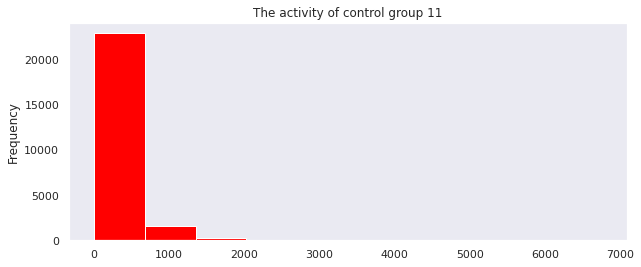

In [ ]:
# plot the figure
plt.figure(figsize=(10,4))
df3.activity.plot(kind='hist', bins=10, color='red')
# define the title 
plt.title('The activity of control group 11')
plt.grid()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


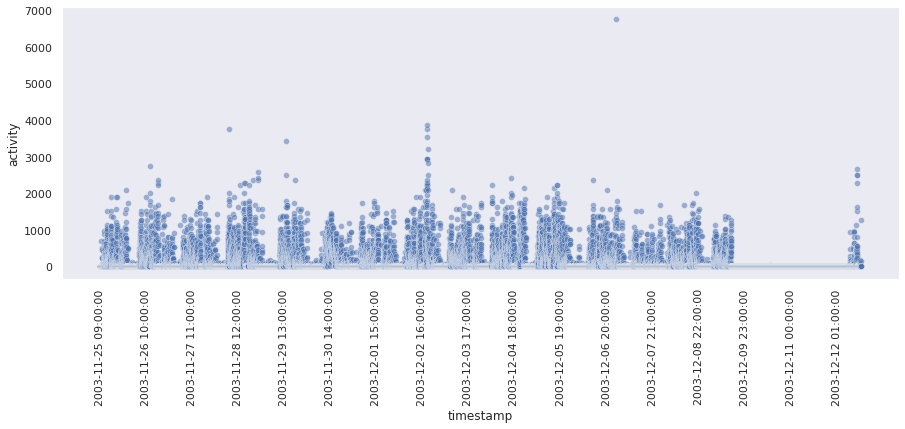

In [ ]:
# plot the figure
plt.figure(figsize=(15,5))
# define the axis
ax = sns.scatterplot(df3.timestamp, df3.activity, alpha=0.5)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
# rotate the x ticks 
plt.xticks(rotation=90)
plt.grid()
plt.show()

From the analysis above, we know that the cartigraphy data of control data 10 has more activity on average than control data 11. 